## **Support Vector Machines Theory and Math**


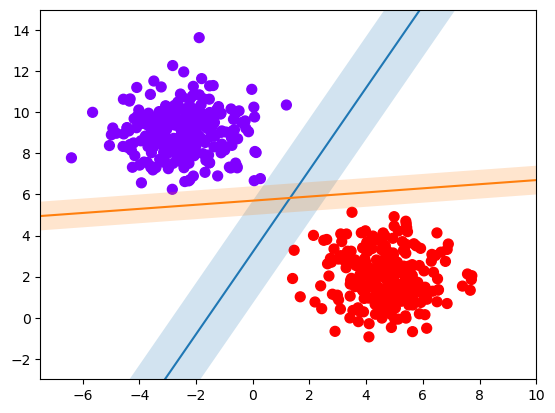

In [8]:
xfit = np.linspace(-7.5, 10)
  
# plotting scatter
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='rainbow')
  
# plot a line between the different sets of data
for m, b, d in [(2, 3.2, 2.5), (0.1, 5.7, 0.7)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit)
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', alpha=0.2)
  
plt.xlim(-7.5, 10);
plt.ylim(-3, 15)
plt.show()

### That blue classification margin is what we are aiming for. 
* We want to classify as many training examples correctly as we can while maintaining the largest 'gutter width' or 'margin width'.

* This helps in coming up with a model that will do justice to both the classes equally given the 'trend' of training data.

* Note that our model will heavily depend on the **Support Vectors** which are the data points closest to the decision boundary belonging to each of the classes.

* The black dots in the next image are our support vectors for the classifier

* Notice that our model will be very sensitive to outliers and thus accuracy can get severely affected if outliers are not treated properly. This is a problem particularly for hard margin classifiers.

* Thus we can say that Support Vector Machines generally do better with data with less outliers. This might mean that SVMs do better with less data as lesser the data, lesser the outliers but this might not be true always.

* Contrary to the point above, SVMs can be very efficient because all a SVM classifer has to store is the Support Vectors (their locations) and the hyperplane corresponding to them.

* SVM is generally effective when data is **multi-dimensional** because the **kernel trick** helps in giving us the *'higher dimensional inner products' without actually transforming the lower dimensional data to higher dimensions and then calculating the inner product*. This prevents memory leaks and is a lot more efficient.

<div>
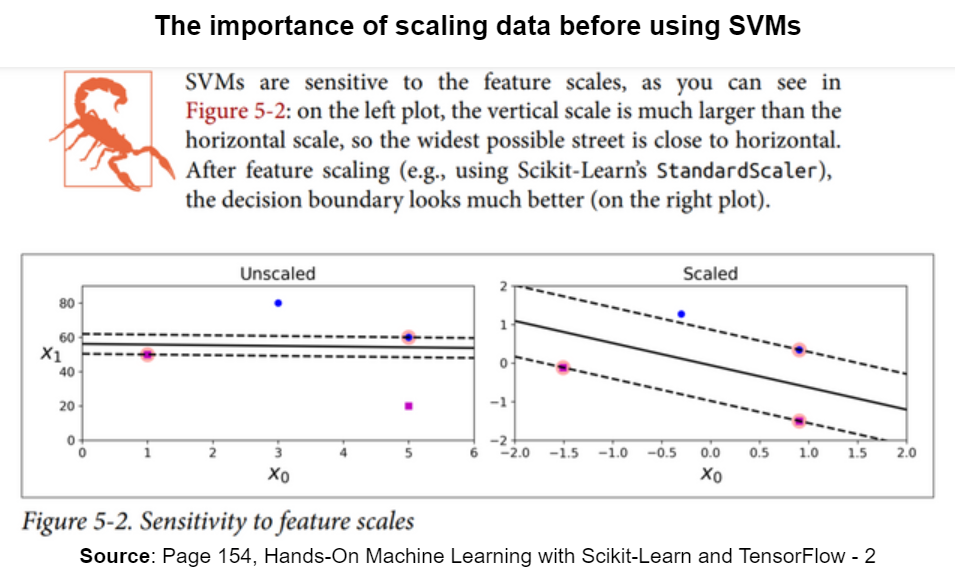
</div>

# <u>**Theory and Maths for SVM** </u>
    
<br><br>

<div>
<center><img src='https://miro.medium.com/max/1400/1*i7dAZe3aSZP6KNHhgk0GVg.png' width=500></center>
</div>

#### <u>**NOTE:**</u>

<font size=4>**Width of the street**:</font>

>>$ = (\textbf{x}_{svr} - \textbf{x}_{svl}).\dfrac{\textbf{w}}{||w||}$   
>>$ = \dfrac{(\textbf{x}_{svr}.\textbf{w} - \textbf{x}_{svl}.\textbf{w})}{||w||}$
>>$ = \dfrac{(\textbf{w}.\textbf{x}_{svr} - \textbf{w}.\textbf{x}_{svl})}{||w||}$
>which is basically the distance between two support vectors (of different classes) in the direction of $w$ (normal to the street),

><i>For Support Vectors,</i>
>>$\ y_{sv}(\textbf{w}^T\textbf{x}_{sv}  + b) = 1$

>>$\textbf{w}^T\textbf{x}_{sv-}  + b = -1$ &nbsp;&nbsp;&nbsp; $(for - SV)$
>>$\textbf{w}^T\textbf{x}_{sv+}  + b = +1$ &nbsp;&nbsp;&nbsp;&nbsp; $(for + SV)$

>>$\textbf{w}^T\textbf{x}_{sv-} = -1 - b = \textbf{w}.\textbf{x}_{sv-}$<br>
>>$\textbf{w}^T\textbf{x}_{sv+} = +1 - b = \textbf{w}.\textbf{x}_{sv+}$

> **Width** $ = \dfrac{1 - b - (-1 - b)}{||w||} = \dfrac{\textbf{2}}{\textbf{||w||}}$

<br>

#### <u><font size=4>**Optimization Objective**</font></u>
<font size=4><center>$Min $&nbsp;$ \dfrac{1}{2}$ $||w||^2$</center>

<center>
$s.t.$ &nbsp; $ y_i(w^Tx_i  + b) \geq 1$
</center>
</font>

### <u>**Primal Lagrangian Problem**</u>

<div>
<center><img src='https://miro.medium.com/max/899/1*L0l8cVX-bgsr9voLqToIew.png'>
<img src='https://miro.medium.com/max/665/1*2wh3ziYg-fVMLP4ObNFJBQ.gif'></center>
</div>

**Note:**
1. Right now our Primal Problem depends on w, b and alphas. It would be very helpful if this dependence reduces to just 1 variable.
2. A lot of the Lagrangian Multipliers alpha's will become 0 because a lot of the data points won't be support vectors.

<div>
<center><img src='https://miro.medium.com/max/1298/1*AMPyySXbQ3m3kAuobLefyQ.png' width=400>
<img src='https://miro.medium.com/max/627/1*pvxaWzgMnJQsvkbOnmxtOw.png' width=300></center>
</div>

### <u>**Dual Problem after substituting values of w and b**</u>
<br> <br>
<div>
<center><img src='https://miro.medium.com/max/1050/1*yUrbqDeRoQpsB4WqjsAMjw.png' width=600>
<img src='https://miro.medium.com/max/828/1*dZDt1nn5YW2DC4dYQSIp2w.png' width=400></center>
</div>

Now our dual problem depends on just the alphas and thus is much more easier to solve.

**Note:**
1. That cheeky little inner product between the training samples<b> $<$x<font size=1>m</font>, x<font size=1>n</font>$>$</b> is very special to us and will help us tremendously in deriving the intuition behind kernels which I have discussed in detail in my notes.

2. Note that a lot of the values in the second term will become zero because even if one of the training samples is a Support Vector, α<font size=1>m</font> or α<font size=1>n</font> will be zero.

### <u>**Introduction to Kernels**</u>
Once we have our inner products, we might want to 'elevate' our feature space to higher dimensions in order to make our data linearly separable or at least somewhat linearly separable.

This can be achieved either by **elevating the individual samples to the higher dimension and then calculating the inner product in the higher dimensions** or by having **a magical function that will directly return the inner products of the higher dimensional feature space without actually carrying out the 'elevation' of the original features**.

<div>
<center><img src='https://miro.medium.com/max/1400/1*4hVAPL2cSycg0fYz3MZoYw.png' width=500></center>
</div>

### <u>**Example**</u>:

Suppose you have a feature space in 2 Dimensions (x, y) and you want to convert it into a 3 Dimensional Feature Space as shown:


[$a_1$ &nbsp; $a_2$]  --->  [$a_1^2$ &nbsp; $\sqrt2 a_1a_2$  &nbsp;  $a_2^2$]

<div>
<center><img src='https://miro.medium.com/max/1001/1*u1yfAN8ooz66BJljnqHqzA.png' width=500></center>
</div>

### <u>**Dual Problem after applying Kernel**</u>:

<div>
<center><img src='https://miro.medium.com/max/908/1*yRSzCvyos95QYJYXOSmfrQ.png' width=500></ center>
</div>


### <u>**Following are the choices we have for kernels in SVM Classifier:**</u>
* **Linear Kernel( No kernel needed )**
* **Polynomial Kernel**
<div>
<center><img src='https://miro.medium.com/max/482/1*Tt5V_m9iIwXc1xYoDLYmCA.png' width=400></center>
where b defines the dimension of the new space to which we want to map our original features.
</div>

* **Radial Basis Function Kernel (RBF Kernel)**
<div>
<center><img src='https://miro.medium.com/max/504/1*jTU-kuAWMnMMYwBWj8mTVw.png' width=400></center>
where $\gamma$ is a tunable constant varying from 0 to 1. A standard is to set $\gamma$ = 0.1.
</div>

* **Gaussian Kernel**
<div>
<center><img src='https://www.geeksforgeeks.org/wp-content/ql-cache/quicklatex.com-0afd4e84fe5500ae593f6447a66fb7e8_l3.svg' width=200></center>
and some more that we will not be covering.
</div>

### <u>**Soft Margin**</u>

A Soft Margin SVM classifier can be understood by taking a Hard Margin SVM classifier and allowing some outlier data points to sort of **violate the constraint equation** defined above. This allows for some *misclassifications* but helps in *reducing overfitting* and *unnecessary 'elevation' to higher dimensions* wherever possible.

For Soft Margin SVM, we need to consider the slack variable $ξ$ which helps in defining the degree to which we would like to skip some of the outliers in our data if any.

**Slack variable ( $ξ$ )**: Is the error term introduced in soft margin SVMs which allows for some outliers to be misclassified so that our model can deal with non-linearly separable data without overfitting the data.

<br>

#### <u>**New Constraint Equation:**</u>
<div>
<center><img src='https://miro.medium.com/max/441/1*aCakxlEZUNECqNDeGd-hMg.png' width=250>
</center>
</div>
<br>

#### <u>**Optimization Objective:**</u>
<div>
<center><img src='https://miro.medium.com/max/470/1*_JKyikmkspqBLU4-X4NDHA.png' width=250></center>
<center><img src='https://miro.medium.com/max/663/1*7Bjnjsd3oXTzIDPPnF6tfw.gif'></center>
</div>

The second term here is a product of a new variable C we define and the sum of all epsilons. This will enforce that when C is larger, our optimization algorithm will try to reduce the slack variables more resulting in a stricter margin and vice versa.

#### <u>**Primal Lagrangian Problem**</u>
<div>
<center><img src='https://miro.medium.com/max/1050/1*EWWKD7Si9dc-3X3lqKTCbw.png' width=600></center>
</div>


Here, μ is a Lagrange multiplier we have defined for the tolerance values ε. We expect each μ to be greater than or equal to zero.

So, in total we have 4 different variables in our Primal Problem:
1. $\textbf{w}$
2. $b$
3. $\alpha_n$
4. $\epsilon_n$

#### <u>**Partial Derivatives of Primal Problem for Soft Margin:**</u>
<div>
<center><img src='https://miro.medium.com/max/993/1*KqHSqU9neXp4INMI37J0Ww.png' width=500></center>
</div>

Giving us-

<div>
<center><img src='https://miro.medium.com/max/1004/1*oolfRhznW2P8A5SNDVfTvw.png'></center>
</div>

Now, since $\mu_n$ is our Lagrangian Multiplier, thus:

<center><font size=4>$\mu_n$ $\geq$ 0</font></center>

This implies the following:

<div>
<center><img src='https://miro.medium.com/max/590/1*w0b2SBsRcBMLVG2Bas4mmg.png' width=350></center>
</div>

Finally, using all the equations we have obtained in the Primal Problem like we did for Hard Margin SVM, we get the following:

<div>
<center><img src='https://miro.medium.com/max/908/1*YNtivE3wVi2OsyO10DddlA.png' width=500></center>
</div>
    

## <u>**Using CVXOPT for optimization**</u>

We have finally come down to solving the dual problem we had derived earlier using quadratic programming. 

We can also use Gradient Descent for the same, but the Kernel trick will be helpful for non-linear data and quadratic optimization takes advantage of the Kernel Trick for 'elevating' the inner products to higher dimensions.

For using CVXOPT, our optimization problem must be present in a particular form as given below:

<div>
<center><img src='https://miro.medium.com/max/833/1*UunRf7HGFHxtJUxYpEPMlw.png'></center>
</div>

Given our Soft Margin Dual Optimization Problem,

<div>
<center><img src='https://miro.medium.com/max/359/1*fOiAmCx9TXYbDQdsxxW2hg.png'></center>
</div>

This is how CVXOPT recieves our problem for optimization:

<div>
<center><img src='https://miro.medium.com/max/486/1*cGaLUuRa-yzsoVLUM2hWng.png'></center>
</div>
    

### **Don't forget to perform feature scaling on the data before using a kernel like the Gaussian Kernel / RBF Kernel.**
The reason behind performing feature scaling is that in the case of Gaussian Kernel,
<div>
<center><img src='https://www.geeksforgeeks.org/wp-content/ql-cache/quicklatex.com-0afd4e84fe5500ae593f6447a66fb7e8_l3.svg' width=200></center>
</div>
    

where we have to calculate the $l2$ norm of $x-y$ where x will be all our training/testing samples and y will be our 'landmarks' around which our Kernel will find the similarity for us.
In this case, if different features are differently ranged, then some of the features might get neglected because of the presence of some huge-valued features. 

For example, if one of the features is number of bedrooms (1-5) and the other is average income (Rs 10,000 - Rs 1,00,00,000). Then the values of $||x_i - l_i||$ for average income will over-power that for number of bedrooms.

So, always perform feature scaling before feeding data into an SVM (especially when using Gaussian/RBF Kernel).